In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
from dsp.Runner import sequence_search, distance_based
from dsp.Problem import Problem
from dsp.Solver import DPSolver
from dtspx_ampl import ampl_solve
import pandas as pd
import pprint as pp
import plotly.graph_objects as go

In [27]:
T = 6
TW = np.int(np.floor(T/(5/60)+0.1))
np.random.seed(10)
# Data
x_data = np.genfromtxt("data/x.csv", delimiter=",")
y_data = np.genfromtxt("data/y.csv", delimiter=",")

xy_data = np.stack([x_data, y_data], axis=2)

P = Problem(xy_data, T=6)

ALPHA = set(P.in_working_area)
root = DPSolver(P, seq=[])

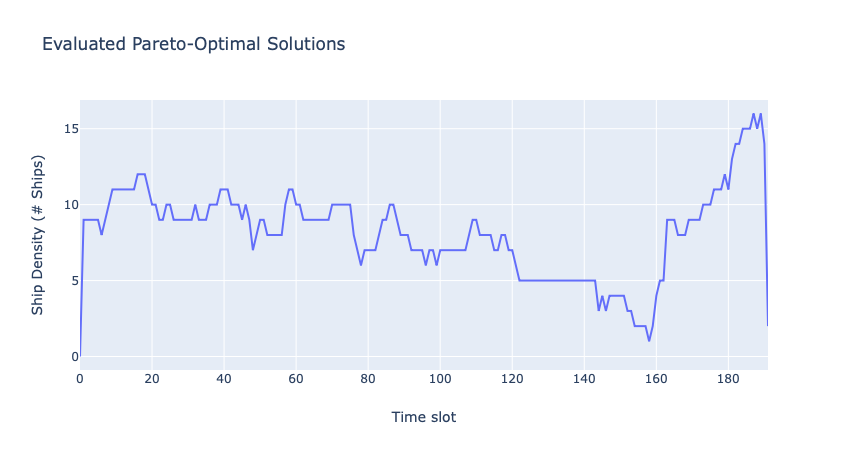

In [45]:
density = np.count_nonzero(x_data, axis=1)
times = np.arange(len(density))

fig = go.Figure()
fig.add_trace(go.Scatter(x=times, 
                         y=density))

fig.update_layout(title='Evaluated Pareto-Optimal Solutions',
                  yaxis_zeroline=False, xaxis_zeroline=False, 
                  xaxis_title="Time slot", yaxis_title="Ship Density (# Ships)")
fig.show()